In [1]:
#import packages that we'll use often.
import numpy as np
from numpy import fft
import scipy as sp
from scipy.interpolate import interp1d

import math
from astropy.io import ascii

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.colorbar as cb
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 200

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 6,6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

In [2]:
def stringTimestep(beforeString, nowString, yLeft, yRight, timeStep, nodeStep, T, mu): 
        
    #find the number of nodes in our string    
    nodes = beforeString.shape
    #print(nodes)
    
    #copy an array so that 
    nextString = np.copy(beforeString)
        
    cString = math.sqrt(T/mu)
    r = cString * timeStep / nodeStep
    
    #enforce the boundary conditions
    nextString[0] = yLeft
    nextString[nodes[0]-1] = yRight
    
    KE = 0
    PE = 0
    
    #loop through the string and determine what the next string should look like
    for i in range(1,nodes[0]-2):
        nextString[i] = 2*(1-(r**2))*nowString[i] - beforeString[i] + (r**2)*(nowString[i+1]+nowString[i-1])   
        KE = KE + 0.5*mu*((nextString[i] - beforeString[i])/(2*timeStep))**2
        PE = PE + 0.5*T*( (nowString[i+1]-nowString[i])/nodeStep)**2
    
    print(KE, PE)
    return nextString, KE, PE

In [3]:
def runString(T, mu, driveAmp, driveOmega, deltaX, nodes, deltaT, n_timesteps, plotname):

#set up the parameters that define the simulation
#deltaX = math.pi/10
#deltaT = math.pi/20
#n_timesteps = 50000

    #calculate c from T and mu
    c = math.sqrt(T/mu)

    #set up a string that is N nodes long
#nodes = 600
    beforeString = np.zeros(nodes)
    nowString = np.zeros(nodes)
    exes = np.linspace(0, (nodes-1)*deltaX, nodes) 
    times = np.linspace(0, (n_timesteps-1)*deltaT, n_timesteps)
    KE = np.zeros(n_timesteps)
    PE = np.zeros(n_timesteps)
    
    #set up an array to track the motion of the 20th node of the string
    node5 = np.zeros(n_timesteps)

#set up the physics constants that define the string and the driving motor
#c = 1
    fixedPoint = 0
#driveAmp = 10
#driveOmega = 1

    #plot the initial conditions of the string
    string, = plt.plot(exes, nowString, linewidth = 2)

    #make variables to track the vertical offset and the energies
    vert_offset = 0
    
    #loop through and update the string
    for i in range(0,n_timesteps-1): 
        
        node5[i] = nowString[5]
        drivePoint = driveAmp*np.sin(driveOmega*times[i])
    #print(drivePoint)
    #print(drivePoint[0])
    
        nextString, KE[i], PE[i] = stringTimestep(beforeString, nowString, drivePoint, fixedPoint, deltaT, deltaX, T, mu)
        #print(KE[i], PE[i])
        beforeString = np.copy(nowString)
        nowString = np.copy(nextString)

        if ( (i > 249) and ((i % 400) == 0) ):
            #print(i, (i % (n_timesteps/10)), thisTime)
            vert_offset = vert_offset+nowString.ptp()
            string, = plt.plot(exes, nowString+vert_offset, linewidth = 2, label = 't = '+times[i].__str__())
            
    xlabel = plt.xlabel('$x$ (m)') 
    ylabel = plt.ylabel('$y$ (m)')
    freq = driveOmega/(2*math.pi)
    title = plt.title('T = '+str(T)+', '+r'$\mu$ = '+str(mu)+', $\omega$ = '+str(driveOmega)+', A = '+str(driveAmp)+', $\Delta$x = '+'{:.5}'.format(str(deltaX))+', $\Delta$T = '+'{:.5}'.format(str(deltaT)), fontsize=14)
#plt.legend(handles=[string], loc=1)
    plt.gray()
    plt.savefig(plotname+'.stack.png', bbox_inches='tight')    

    plt.clf()
    
    freq, = plt.plot(times, node5, linewidth = 2)
    xlabel = plt.xlabel('$t$ (s)') 
    ylabel = plt.ylabel('$y$ (m)')
    title = plt.title('T = '+str(T)+', '+r'$\mu$ = '+str(mu)+', $\omega$ = '+str(driveOmega)+', A = '+str(driveAmp)+', $\Delta$x = '+'{:.5}'.format(str(deltaX))+', $\Delta$T = '+'{:.5}'.format(str(deltaT)), fontsize=14)
    plt.xlim([0,10*math.pi])
    plt.gray()
    plt.savefig(plotname+'.freq.png', bbox_inches='tight')   
    
    return nowString, times, KE, PE

0.0 0.0
0.0 0.0
0.0487278087305 0.0
0.729542418811 0.0121819521826
3.30944205486 0.176541945588
8.98965933105 0.960916458455
18.1414030899 3.22000507187
30.0263822733 7.95357989497
43.1260394864 15.8330709177
55.8265704362 26.7683356117
67.0297140787 39.8009792769
76.3742932082 53.4178270218
84.0460147892 66.1153052284
90.4034776702 76.8995310478
95.698269764 85.4732750898
100.022455301 92.0779582888
103.419184367 97.1638723766
105.994559958 101.118816944
107.920907885 104.181064624
109.349658389 106.500973656
110.336925225 108.22460527
110.863123172 109.504347843
110.934328754 110.443548338
110.677779841 111.055234208
110.350399721 111.299963848
110.254505579 111.188867126
110.629192006 110.872017504
111.597626435 110.638067525
113.196846777 110.820653368
115.44942169 111.678554961
118.41231065 113.331100626
122.170919451 115.781066571
126.799646027 118.990399752
132.335277212 122.944679038
138.788374459 127.667771204
146.17533346 133.198269703
154.531672427 139.567442336
163.88474397

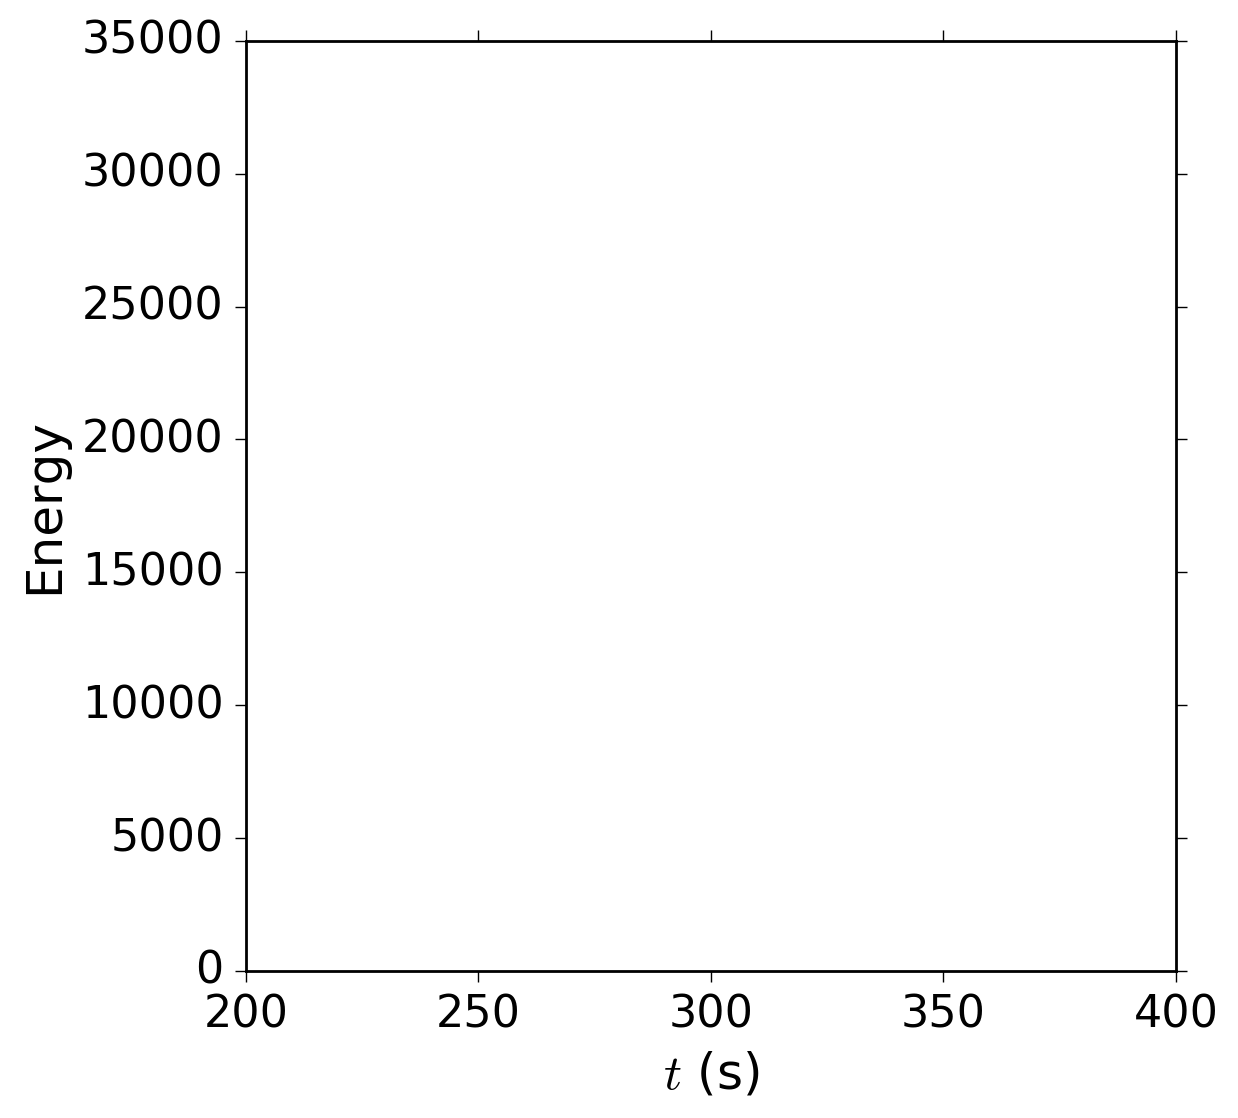

In [9]:
#run a high amplitude model
deltaX = math.pi/10
deltaT = math.pi/40
n_timesteps = 2500

#set up the physics constants that define the string and the driving motor
T = 1
mu = 1
c = 1
nodes = 600
fixedPoint = 0
driveAmp = 10
driveOmega = 1

plotname = 'highAmpDrive'

nowString, times, KE, PE = runString(T, mu, driveAmp, driveOmega, deltaX, nodes, deltaT, n_timesteps, plotname)

print(KE)
print(PE)
print(times)
plt.clf()
TE, = plt.plot(times, KE+PE, marker = '.', label = 'TE', color = 'blue', markersize = 0.01)
PE, = plt.plot(times, PE, marker = '.', label = 'PE', color = 'green', markersize = 0.01)
KE, = plt.plot(times, KE, marker = '.', label = 'KE', color = 'red', markersize = 0.01)
xlabel = plt.xlabel('$t$ (s)') 
ylabel = plt.ylabel('Energy')
plt.xlim([200,400])
plt.savefig(plotname+'.Energy.png', bbox_inches='tight')   

In [ ]:
#run a low amplitude model
deltaX = math.pi/10
deltaT = math.pi/20
n_timesteps = 5000

#set up the physics constants that define the string and the driving motor
T = 2
mu = 4
c = 1
nodes = 600
fixedPoint = 0
driveAmp = 0.1
driveOmega = 0.25

plotname = 'lowAmpDrive'

nowString = runString(T, mu, driveAmp, driveOmega, deltaX, nodes, deltaT, n_timesteps, plotname)

plt.clf()

fft = np.fft.fft(nowString)
fft_freq = np.fft.fftfreq(nodes)

showfft, = plt.plot(fft_freq, np.abs(fft)**2, linewidth = 2)
plt.xlim([0,0.6])

In [ ]:
print(0.25/(2*math.pi))
print(10*math.pi)
print(math.sqrt(2/4)/(0.25/(2*math.pi)))

### 